# Introducción a Python Científico

## Índice

 * [Scientific Computing Tools for Python](#Scientific-Computing-Tools-for-Python)
 * [Energía y potencia](#Energia-y-potencia)
     * [SymPy](#SymPy)
 * [Secuencias](#Secuencias)
     * [Numpy](#Numpy)
         * [Importando la librería y creando un array](#Importando-la-libreria-y-creando-un-array)
         * [Listas y arrays](#Listas-y-arrays)
     * [Matplotlib](#Matplotlib) 
 * [Referencias](#Referencias)
 * [Licencia](#Licencia)

## Objetivos del notebook

* Importar y trabajar con librerias de Scipy (Sympy, numpy y matplotlib)
* Calcular energía y potencia.
* Introducción a secuencias.

## Scientific Computing Tools for Python

Se denomina **SciPy (Scientific Comuting Tools for Python)** a todo el paquete de librerías que engloba a Numpy, Matplotlib, la librería del mismo nombre, Sympy y Pandas. Éstas, en su conjunto, proveen **herramientas Open Source** para la **implementación de operaciones matemáticas y algebraicas, algoritmos de procesamiento de señales, estadísticas y graficadores en 2 y 3 dimensiones**.

![](../img/scipy-org.png)

**Podemos encontrar una extensa documentación en su [página web](https://www.scipy.org/)**

**Para lo usuarios de [MATLAB](https://www.mathworks.com/products/matlab.html) la [siguiente documentación](https://www.mathworks.com/products/matlab.html) es util para facilitar la migración.**

## Energia y potencia

En muchas aplicaciones, aunque no en todas, las señales que examinamos están directamente realacionas con cantidades físicas que capturan potencia y energia de un sistema físico [Oppenheim A.,pp. 5-7, 1998]. Por ejemplo, el voltaje y la corriente a través de un resistor con resistencia R, entonces la **potencia istantánea** es:

$$ p(t)=v(t)i(t)=\frac {1}{R}v^2(t) $$

Entonces la **energía total** gastada durante un **intervalo de tiempo continuo** $[t_1:t_2]$ se define como:

$$E[p(t)]_{t_1 \rightarrow t_2} = \int_{t_1}^{t_2} p(t) dt = \int_{t_1}^{t_2} \frac {1}{R} \vert v(t) \vert^2 dt$$

La **potencia promedio** durante el mismo **intervalo de tiempo continuo** $[t_1:t_2]$ es:

$$P[p(t)]_{t_1 \rightarrow t_2} = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} p(t) dt = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} \frac {1}{R} \vert v(t) \vert^2 dt$$

De lo presentado anteriormente se desprende la definición de **energia total** durante un **intervalo de tiempo continuo** $[t_1:t_2]$:

$$E[x(t)]_{t_1 \rightarrow t_2} = \int_{t_1}^{t_2} \vert x(t) \vert^2 dt$$

En el **caso discreto** de una señal $x[n]$ en el intervalo $[N_1:N_2]$ se define como:

$$E[x[n]]_{N_1 \rightarrow N_2} = \sum_{n \rightarrow N_1}^{N_2} \vert x[n] \vert^2$$

Y la definición de la **potencia promedio** durante el mismo **intervalo de tiempo continuo** $[t_1:t_2]$:

$$P[x(t)]_{t_1 \rightarrow t_2} = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} \vert x(t) \vert^2 dt$$

En el **caso discreto** de una señal $x[n]$ en el intervalo $[N_1:N_2]$ se define como:

$$P[x[n]]_{N_1 \rightarrow N_2} = \frac {1}{N_2-N_1+1} \sum_{n \rightarrow N_1}^{N_2} \vert x[n] \vert^2$$

Con $\vert x(t) \vert$ la magnitud de una señal continua o señal discreta .

En muchos sistemas nos interesa examinar la **potencia** y **energía de señales** en un **intervalo de tiempo infinito**:
* **Energía** total para tiempo **continuo**:

$$E_\infty=\lim_{T \to \infty }\int _{-T}^{T} \vert x(t) \vert^2 dt=\int _{-\infty}^{\infty} \vert x(t) \vert^2 dt$$

* **Energía** total para tiempo **discreto**:

$$E_\infty=\lim_{N \to \infty }\sum _{n=-N}^{N} \vert x[n] \vert^2 =\sum_{n=-\infty}^{\infty} \vert x[n] \vert^2$$

* **Potencia** promedio para tiempo **continuo**:

$$P_\infty=\lim_{T \to \infty } \frac{1}{2T} \int _{-T}^{T} \vert x(t) \vert^2 dt$$

* **Potencia** promedio para tiempo **discreto**:

$$P_\infty=\lim_{N \to \infty } \frac{1}{2N+1} \sum_{n=-N}^{N} \vert x[n] \vert^2 $$


El analisis de las señales $x(t)$ o $x[n]$ en un **intervalo infinito** permite identificar tres clases importantes de señales: 
* Son señales con **energía finita (o señales de energía)**, si y sólo si, $0<E_\infty<\infty$ (**energía total finita**). Una señal de este tipo debe tener una **potencia promedio igual a cero**, ya que, en el caso de tiempo continuo, por ejemplo, vemos que:
$$P_\infty=\lim_{T \to \infty}\frac{E_\infty}{2T}=0$$

* Son señales con **potencia promedio finita (señales de potencia)**, si y sólo si $0<P<\infty$ (**potencia promedio finita**). Entonces, si $P_\infty >0$, por necesidad $E_\infty \to \infty$. Esto tiene sentido, ya que si se tiene una energía promedio por unidad de tiempo diferente de cero, entonces integrando o sumando en un intervalo de tiempo infinito produce una cantidad de **energía infinita**. Por ejemplo, la señal constante $x[n]=4$ tiene energía infinita, pero la potencia promedio es $P_\infty=16$. Otro ejemplo de esto son las señales periodicas.

* Señales con **energia** y **potencia promedio infinita**, por ejemplo la señal $x(t)=t$.

### SymPy

![](../img/sympy.jpeg)

[SymPy](https://www.sympy.org/en/index.html) es una biblioteca para matemática simbólica, similar a software como [Mathematica](https://www.wolfram.com/mathematica/) o [Mathcad](https://www.mathcad.com/es).
Comunmente, las computadoras usan una [coma flotante](https://en.wikipedia.org/wiki/Floating_point) para representar números reales (y complejos) y calcular operaciones matemáticas. Esto implica que la precisión es limitada.

In [ ]:
import math
math.sqrt(8)

Los sistemas de cálculo simbólico (o álgebra computacional), utilizan una representación simbólica (presentada de la manera más simplicifada posible). Es un área científica que se refiere al estudio y desarrollo de algoritmos y software para la manipulación de expresiones matemáticas y otros objetos matemáticos. Aunque, hablando con propiedad, el álgebra computacional debe ser un sub-campo de la computación científica, ellos son considerados generalmente como campos distintos, porque la computación científica se basa generalmente en el análisis numérico con números aproximados en punto flotante; mientras que, el álgebra computacional enfatiza el cálculo exacto con expresiones que contengan variables y por lo tanto son manipulados como símbolos (de ahí se debe el nombre de cálculo simbólico).

In [3]:
import sympy

raiz8 = sympy.sqrt(8)
raiz8

2*sqrt(2)

> **Nota 1**: en caso que figuré el siguiente error: *ModuleNotFoundError: No module named 'sympy'*. Indica que no esta instalada la librería, hacerlo usando pip:`pip install sympy`.

> **Nota 2**: para obtener una salida enriquecida:
```python
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
```

Podemos, por supuesto, evaluar la expresión simbólica

In [ ]:
raiz8.evalf()

Por defecto la evaluación numérica se lleva a cabo con un precisión de 15 decimales. Pero puede ajustarse la precisión al número de decimales que uno desee, enviando el número de decimales como argumento a evalf().

In [ ]:
raiz8.evalf(n=150)

SymPy utiliza como background la biblioteca [mpmath](https://code.google.com/archive/p/mpmath/) que le permite realizar cálculos con aritmética de precisión arbitraria, de forma tal que ciertas constantes especiales, como pi, el número e, $\infty$, son tratadas como símbolos y pueden ser evaluadas con aritmética de alta precisión.

Veamos un ejemplo, para entender como resolver estos problemas. Calcular energía y potencia de la siguiente señal:
$$f(t)=2e^{-t}u(t)$$

In [4]:
from sympy import exp, Heaviside # importar funciones
t, T = sympy.symbols('t T') # asignación multiple

In [5]:
f = 2*exp(-t)*Heaviside(t) # definicion
f

2*exp(-t)*Heaviside(t)

In [6]:
from sympy.plotting import plot # función para graficar

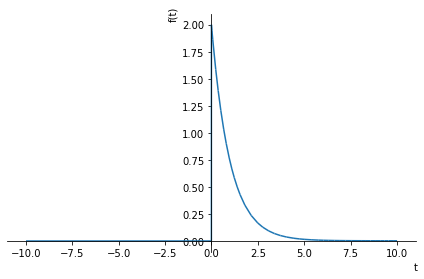

In [7]:
plot(f)

$$E_\infty=2\int _{0}^{\infty} \vert e^{-t} \vert^2 dt$$

In [8]:
from sympy import limit, integrate # función limite y integral

In [11]:
E =  integrate(abs(f)**2,(t,-sympy.oo, sympy.oo))
E

2

$$P_\infty=\lim_{T \to \infty } \frac{1}{2T} 4 \int _{0}^{T} \vert e^{-t} \vert^2 dt$$

In [12]:
P = limit((1/(2*T)*integrate(abs(f)**2,(t,-sympy.oo, sympy.oo))),T,sympy.oo)
P

0

## Secuencias

Las señales pueden ser clasificadas en **analogicas** o **discretas**. Una señal **analogica** es denotada por $x(t)$, donde la variable t (**variable independiente**) puede ser representada como alguna cantidad fisica **continua**. En nuestro caso de estudio representa el tiempo en segundos (continua). En el caso de una señal **discreta** se denota por $x[n]$ , donde la **variable n** son **valores enteros** y representa instancias de tiempo discreto. A lo largo de este apunte haremos mayor hicapié en las señales discretas, para lo cual vamos a definir una secuencia discreta como:

$$x\left\lbrack n\right\rbrack =\left\lbrace x\left(x\right)\right\rbrace =\left\lbrace \ldotp \ldotp \ldotp ,x\left(-1\right),x^{\uparrow }{} \left(0\right),x\left(1\right),\ldotp \ldotp \ldotp \right\rbrace$$

Python, puede representar solo secuencias de duración finita, por medio de un vector fila. Esto es posible utilizando la libreria [Numpy](https://numpy.org/).

### Numpy

![](../img/numpy.png)

Numpy es la librería dedicada a manipular datos numéricos, ya sea en forma de vectores, matrices u otras estructuras. El **dato** principal con el que se trabaja en numpy es un **array** de una o varias dimensiones. El mismo contiene elementos, en general de formato numérico.  Se pueden definir las siguientes características para un array de numpy:

* Los elementos que lo componen son todos de un mismo tipo o formato.
* Cuenta con una longitud, igual a la cantidad de elementos que contiene por fila; y una cantidad de ejes o dimensiones, igual a la cantidad de filas que contiene.
* Cada elemento del array posee un índice que denota su ubicación dentro del mismo.

#### Importando la libreria y creando un array

Para utilizar Numpy en nuestro código, primero debemos importarla utilizando el comando `import numpy`. Existen varias formas de importar librerías en  Python (como ya vimos en la [clase 3](302_modulos_funciones.ipynb/#Modulos)), en el caso de numpy:

In [ ]:
# 1° forma
import numpy

a = numpy.array([1,2,5,9])

In [ ]:
# 2° forma
from numpy import *

a = array([1,2,5,9])

In [ ]:
# 3° forma
import numpy as np

a = np.array([1,2,5,9])
a[-1]

Por convención general, se suele utilizar la tercera forma para la importación de numpy. Es una forma de abreviar el nombre de la librería, y mantener la referencia de que estamos utilizando elementos de la misma. Esto nos importa para mantener cierto orden en nuestro código, por más que parezca tedioso estar anteponiendo 'np' cada vez que creamos numpy. En los ejemplos subsiguientes, vamos a considerar que se utilizó este método.

#### Listas y arrays

Nótese que al crear arrays, ésto se hace a partir de una lista, es decir que los **datos almacenados en formato de lista se convierten automáticamente en arrays**. Para ejemplificarlo mejor: 

In [ ]:
# creamos el mismo array 'a' a partir de una lista
lista = [1,2,5,9]
b = np.array(lista)

In [ ]:
a, b

> Pero, mientras en las listas se pueden incluir elementos de distinto tipo, en el array todos deben ser un mismo tipo de datos.

In [8]:
# otra lista con datos de distinto tipo
otra_lista = ["bla", 1, True, 3.14]

# si la intentamos convertir en array, ¿fracasamos?:
x = np.array(otra_lista)

# le pedimos a la consola que nos muestre el array
x

array(['bla', '1', 'True', '3.14'], dtype='<U4')

Vemos que el array se crea a partir de una lista con elementos de distinto tipo. Sin embargo, le asigna a todos un mismo formato, en este caso un string del tipo *Unicode* con longitud igual a 4.

In [ ]:
np.arange(1,10,1) # Devuelve valores espaciados uniformemente dentro de un intervalo dado.

In [ ]:
np.linspace(1,10,3) # Devuelve valores espaciados uniformemente dentro de un intervalo dado.

### Matplotlib

Para visulizar las secuencias necesitamos de una libreria destinada a la producción de graficos, como es el caso de [matplotlib](https://matplotlib.org/).

La forma estándar de utilizar `matplotlib`, o por lo menos la más didáctica, es a través del módulo `pyplot`.

In [ ]:
import matplotlib.pyplot as plt

Con la siguiente línea "mágica" de comando, indicamos a Jupyter que muestre las gráficas junto con el código:

In [ ]:
%matplotlib inline # si bien `inline` es el comportamiento por defecto

Retomando la definición de una secuencia, tenemos que pensar que un vector no tiene informacion sobre la posición $n$. La forma correcta de representar una secuencia requiere de dos vectores, uno para $x$ y otro para $n$. Por ejemplo la secuencia: $$x\left\lbrack n\right\rbrack =\left\lbrace 2,1-1,{0^{\uparrow }} ,1,4,3,7\right\rbrace$$ Puede ser representada por:

In [ ]:
x = np.array([2,1,-1,0,1,4,3,7]) # secuencia - rango

In [ ]:
n = np.arange(-3,5) # indices (o posición) - dominio

In [ ]:
plt.plot(x,'.') # sin el vector de indices
plt.grid()

In [ ]:
plt.plot(n,x,'.')
plt.grid()

In [ ]:
plt.stem(n,x) 
plt.grid()

## Referencias

 * *Numpy User Guide*, https://www.numpy.org/
 * Scott, Shell, *An introduction to Numpy and Scipy*, 2014. 
 * Martín, Gaitán. *Curso de Python para ciencias e ingenierías*. Extraido de [GitHub](https://github.com/mgaitan/curso-python-cientifico), 2017.
 * Oppenheim, Alan V.; Willsky, Alan S.; Nawab, S. Hamid. Señales y sistemas. Pearson Educación, 1998.

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))